In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats, interpolate
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 18})

In [3]:
X1 = pd.Series(np.random.normal(500,100,120))
X2 = pd.Series(np.random.normal(500,100,120))
X3 = pd.Series(np.random.normal(500,100,120))
df = pd.DataFrame({'X1':X1,"X2":X2,'X3':X3})
df.head()


,X1,X2,X3
0,472.637955,536.639145,471.061462
1,503.401447,505.153421,509.104519
2,408.493979,419.481564,543.002547
3,550.563805,598.420885,524.626379
4,527.458486,509.384347,507.008743


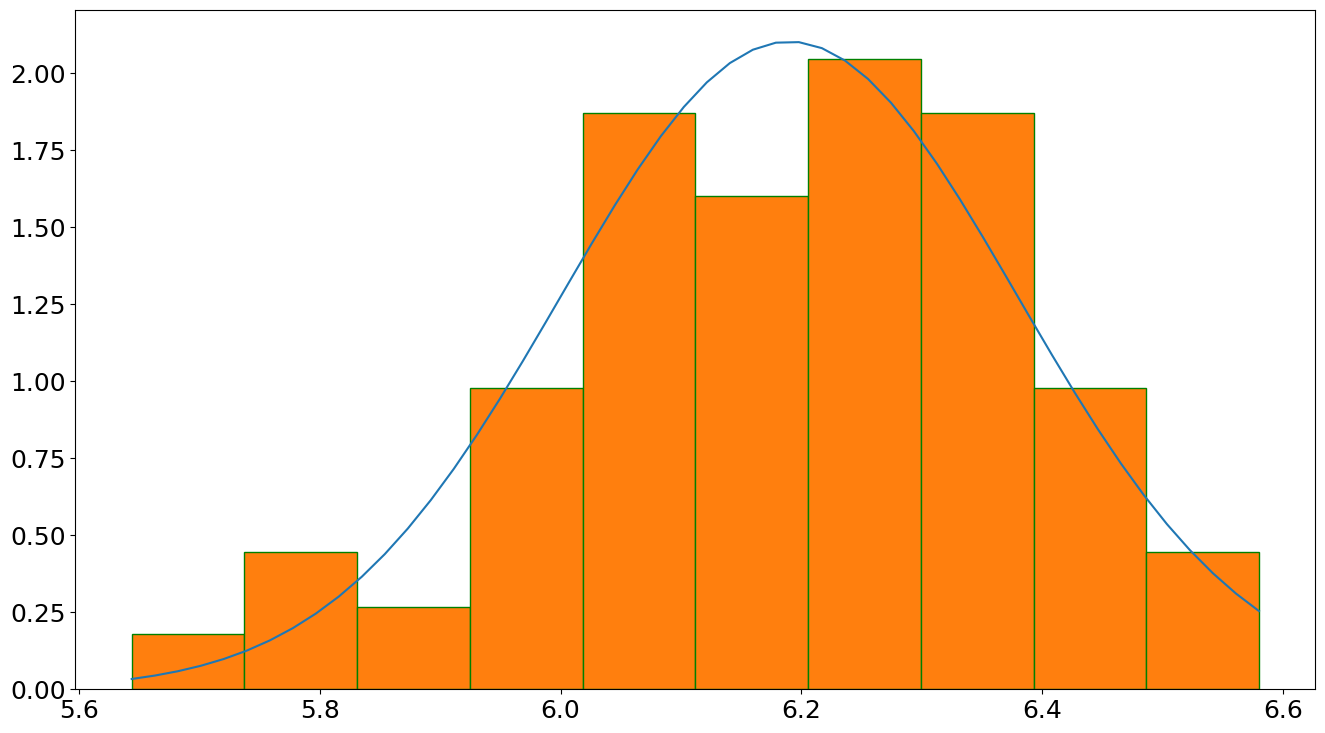

In [4]:
# Engineering feature: log transform #
data = df['X1']
# Sử dụng ln(1+r) ~ r để tránh rate of change #
data = np.log1p(data)

# Kiem tra data co chuan hay khong?
mean = np.mean(data)
# ddof=1 :: hiệu chỉnh
std = np.std(data, ddof=1)
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, stats.norm.pdf(domain, mean, std))
#density=True :: chuẩn hóa dữ liệu về normal
plt.hist(data, edgecolor='green', density=True)
plt.show()

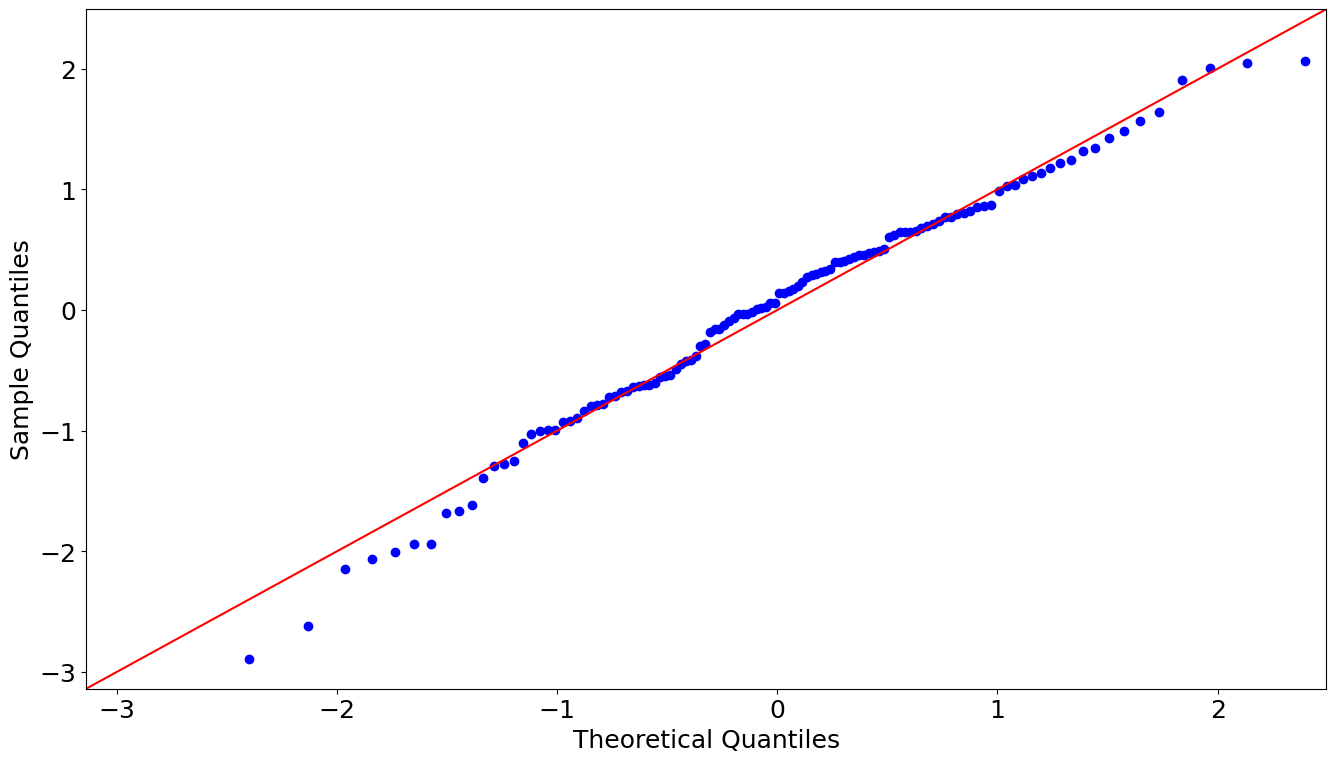

In [5]:
import statsmodels.api as sm
# Đưa dữ liệu về dạng chuẩn tắc #
def standadize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean)/std

sm.qqplot(standadize(data), line ='45')
plt.show()


In [6]:
my_mean = 492
my_log_mean = np.log1p(my_mean)
print(my_log_mean)

6.20050917404269


In [7]:
def results(p, vals=['mean1', 'mean2'], alpha=0.05):
    cols=['score', 'p_value', 'KetLuan']
    if p['p_value'] < alpha:
        p['KetLuan'] = f"Chấp nhận H1 với mức ý nghĩa {alpha}"
    if p['p_value'] >= alpha:
        p['KetLuan'] = f"Chấp nhận H0 với mức ý nghĩa {alpha}"
    df = pd.DataFrame(p, index=[''])
    if vals: cols = vals + cols
    return df[cols]

In [8]:
# Lay ngau nhien 120diem du lieu #
sample = data.sample(n=120)

In [12]:
#Kiem dinh mean cua sample so voi ky vong mu_0=11.918397239722838
# kiem dinh 2 phia: H0: mu = mu_0, H1: mu != mu_0
from scipy.stats import ttest_1samp
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean)
results(p)

,mean1,mean2,score,p_value,KetLuan
,6.189934,6.200509,-0.610577,0.542644,Chấp nhận H0 với mức ý nghĩa 0.05


In [10]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben trai: H0 mu = mu_0, H1: mu < mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='less')
results(p)

TypeError: ttest_1samp() got an unexpected keyword argument 'alternative'

In [11]:
# alternative{‘two-sided’, ‘less’, ‘greater’}
# kiem dinh ben phai: H0 mu = mu_0, H1: mu > mu_0
p = {}
p['mean1'] = np.mean(sample)
p['mean2'] = my_log_mean
p['score'], p['p_value'] = ttest_1samp(sample, my_log_mean, alternative='greater')
results(p)

TypeError: ttest_1samp() got an unexpected keyword argument 'alternative'